### Hello, John Aidan here. This was my first attempt to make a car price prediction. Unfortunatly, I was unaware that the data was from cardekho.com. This is a used car website based in India. It did not line up with car prices where I live, so I had to create an entirely new notebook.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv("/kaggle/input/car-price-prediction-dataset/cardekho.csv")
data = data.rename(columns={"mileage(km/ltr/kg)":"mileage","max_power":"power","selling_price":"price"})
data[data["power"] == " "] = np.nan
data = data.dropna()
data.head()

,name,year,price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,power,seats
0,Maruti Swift Dzire VDI,2014.0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014.0,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006.0,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010.0,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007.0,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [2]:
#fixing name
def nameFix(line):
    return line.split(" ")[0]
data["name"] = data["name"].apply(nameFix)
print(data["name"].head(5))
#fixing owner
def ownerFix(line):
    if line == "Test Drive Car":
        line = "First Owner"
    line = line.split(" ")[0].lower()
    if line == "first":
        return 1
    elif line == "second":
        return 2
    elif line == "third":
        return 3
    return 4
data["owner"] = data["owner"].apply(ownerFix)
print(data["owner"].head(5))
#fixing year
def yearFix(line):
    currYear = 2024
    return currYear - line
data["year"] = data["year"].apply(yearFix)
print(data["year"].head(5))
#fixing seats
def powerFix(line):
    return int(round(float(line)))
data["power"] = data["power"].apply(powerFix)
#turning price into numbers
def priceFix(line):
    return int(line)
data["price"] = data["price"].apply(priceFix)
#turning gas into numbers
def gasFix(line):
    key = {"LPG":0,"CNG":1,"Petrol":2,"Diesel":3}
    return key[line]
data["fuel"] = data["fuel"].apply(gasFix)
def transmissionFix(line):
    if line == "Manual":
        return 0
    return 1
data["transmission"] = data["transmission"].apply(transmissionFix)
def mileageFix(line):
    return int(line)
data["mileage"] = data["mileage"].apply(mileageFix)

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: name, dtype: object
0    1
1    2
2    3
3    1
4    1
Name: owner, dtype: int64
0    10.0
1    10.0
2    18.0
3    14.0
4    17.0
Name: year, dtype: float64


In [3]:
new_data = data.loc[:,["year","km_driven","power","owner","seats","fuel","price","transmission","mileage"]]
new_data = new_data.dropna()

In [4]:
new_data.head(10)

,year,km_driven,power,owner,seats,fuel,price,transmission,mileage
0,10.0,145500.0,74,1,5.0,3,450000,0,23
1,10.0,120000.0,104,2,5.0,3,370000,0,21
2,18.0,140000.0,78,3,5.0,2,158000,0,17
3,14.0,127000.0,90,1,5.0,3,225000,0,23
4,17.0,120000.0,88,1,5.0,2,130000,0,16
5,7.0,45000.0,82,1,5.0,2,440000,0,20
6,17.0,175000.0,58,1,5.0,0,96000,0,17
7,23.0,5000.0,37,2,4.0,2,45000,0,16
8,13.0,90000.0,67,1,5.0,3,350000,0,23
9,11.0,169000.0,68,1,5.0,3,200000,0,20


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
x = new_data.loc[:,["km_driven","power","seats","owner","year","fuel"]]
y = new_data.loc[:,"price"]
trainX,testX,trainY,testY = train_test_split(x,y,random_state = 7,test_size = .2)
print(new_data["power"].value_counts())
lr = LinearRegression()
lr.fit(trainX,trainY)

power
74     688
67     591
82     570
89     474
99     261
      ... 
162      1
156      1
155      1
282      1
135      1
Name: count, Length: 145, dtype: int64


LinearRegression()

In [6]:

results = lr.predict(testX)
r2_score(results,testY)

0.44220377308088876

In [7]:
from sklearn.tree import DecisionTreeClassifier as dtc
tree = dtc(random_state = 14)
tree.fit(trainX,trainY)

DecisionTreeClassifier(random_state=14)

In [8]:
results = tree.predict(testX)
r2_score(results,testY)

0.9379428880905248

<Axes: xlabel='fuel', ylabel='price'>

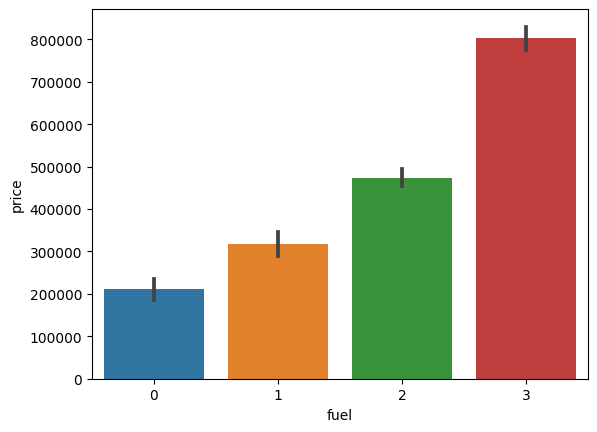

In [9]:
#data["fuel"] vs data["price"]
sns.barplot(data = data,x = "fuel",y = "price")
#{"LPG":0,"CNG":1,"Petrol":2,"Diesel":3}

<Axes: xlabel='power', ylabel='price'>

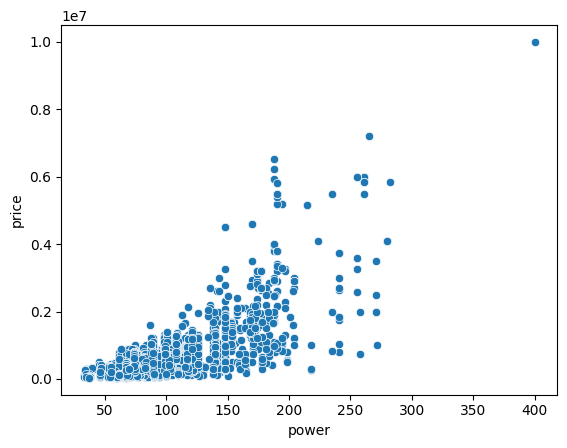

In [10]:
#data["power"] vs data["price"]
sns.scatterplot(data = data,x = "power",y = "price")
#its directly correlated

<Axes: xlabel='transmission', ylabel='price'>

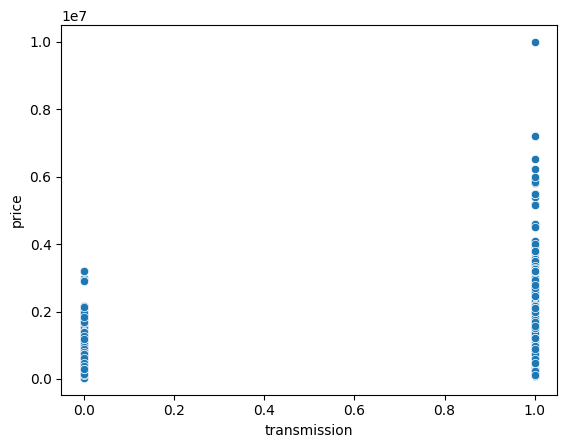

In [11]:
#data["transmission"] vs data["price"]
sns.scatterplot(data = data,x = "transmission",y = "price")
